## Top 50 Revenues of XYZ company

## 1. Importing the libraries

In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc("font", size=14)
sns.set(style="white")
sns.set(style ="whitegrid", color_codes=True)
import numpy as np
import warnings
warnings.filterwarnings("ignore")

## 2. Importing and reading the dataset

In [156]:
df=pd.read_csv('/content/data50.csv')
df.head()

,Unnamed: 0,R&D Spend,Administration,Marketing Spend,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94


## 3. Data Preparation

In [157]:
df['Revenue']=df['R&D Spend']+df['Administration']+df['Marketing Spend']+df['Profit']
df.shape

(50, 7)

In [158]:
print(list(df.columns))

['Unnamed: 0', 'R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit', 'Revenue']


In [159]:
df.isnull().sum()

Unnamed: 0         0
R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
Revenue            0
dtype: int64

In [160]:
print(df['R&D Spend'].unique().shape)
print(df['Administration'].unique().shape)
print(df['Marketing Spend'].unique().shape)
print(df['Profit'].unique().shape)

(49,)
(50,)
(48,)
(50,)


## 4. Creating the independent and target variables

In [161]:
input_cols=['R&D Spend',	'Administration',	'Marketing Spend', 'Profit']
input_cols_new=['R&D_Spend',	'Administration',	'Marketing_Spend', 'Profit']

In [162]:
target_cols=['Revenue']

In [163]:
data_pd=pd.DataFrame()
for i in range(len(input_cols)):
  data_pd[input_cols_new[i]]=df[input_cols[i]]
data_pd.head()

,R&D_Spend,Administration,Marketing_Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [164]:
y=pd.DataFrame()
y['Revenue']=df['Revenue']
y.head()

,Revenue
0,966292.93
1,949665.88
2,853571.99
3,829145.87
4,765855.47


## 5. Data Exploratory Analysis

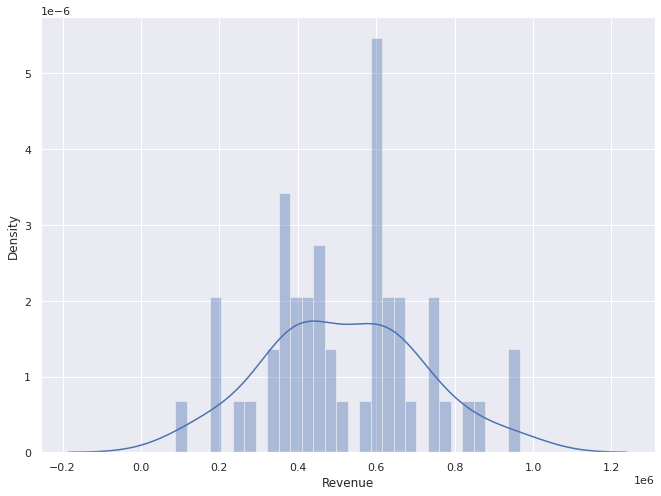

In [165]:
sns.set(rc={'figure.figsize':(11, 8)})
sns.distplot(y['Revenue'], bins= 30)
plt.savefig('Plot A')
plt.show()

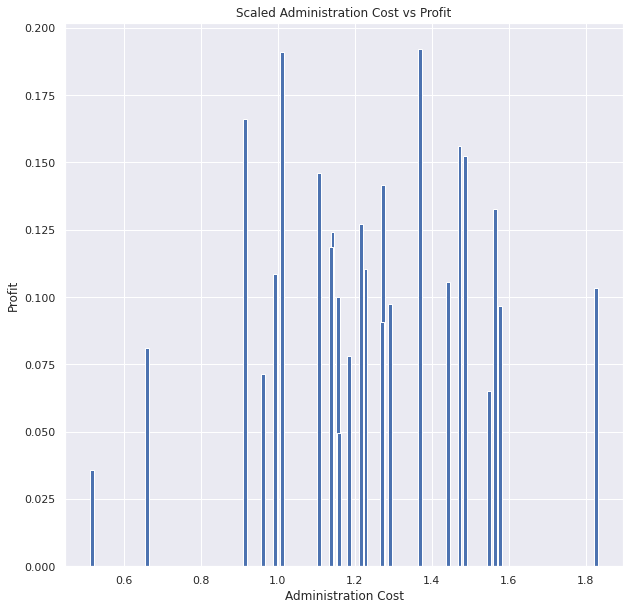

In [166]:
plt.figure(figsize=(10,10))
plt.bar(data_pd['Administration'][0:50:2]/100000,data_pd['Profit'][0:50:2]/1000000,width=0.01)
plt.title('Scaled Administration Cost vs Profit')
plt.xlabel('Administration Cost')
plt.ylabel('Profit')
plt.savefig('Plot B')
plt.show()

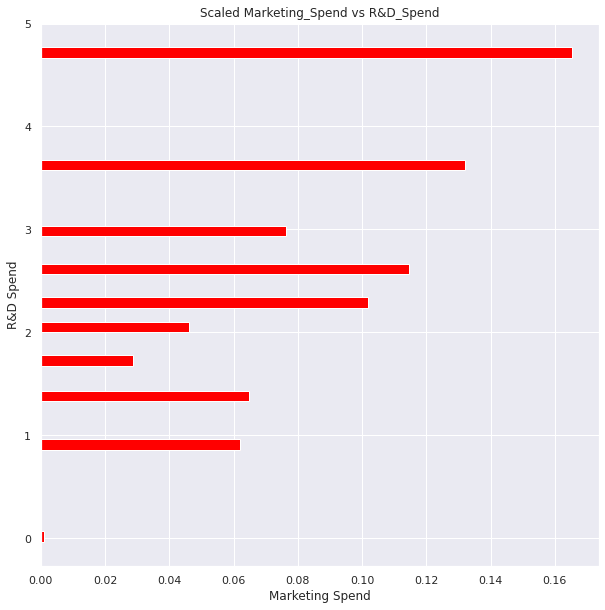

In [167]:
plt.figure(figsize=(10,10))
plt.barh(data_pd['Marketing_Spend'][0:50:5]/100000,data_pd['R&D_Spend'][0:50:5]/1000000,height=0.1,color='red')
plt.title('Scaled Marketing_Spend vs R&D_Spend')
plt.xlabel('Marketing Spend')
plt.ylabel('R&D Spend')
plt.savefig('Plot C')
plt.show()

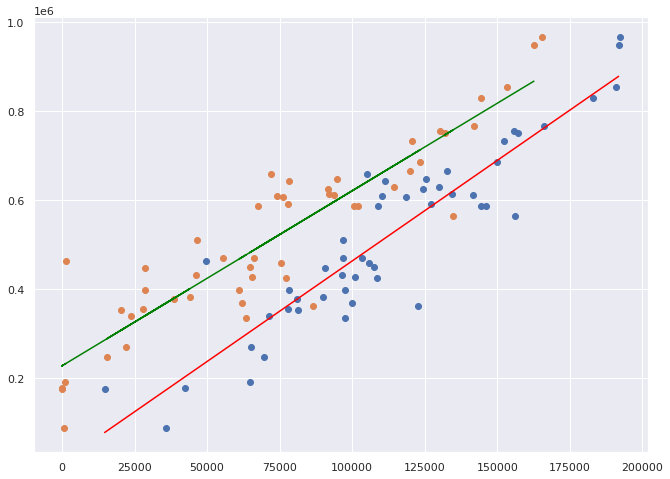

In [168]:
from scipy.stats import burr12
# Drawing regression line
plt.scatter(data_pd[0:]['Profit'],y)
plt.scatter(data_pd[0:]['R&D_Spend'],y)
# plt.scatter(data_pd[0:]['Administration'],y)
m, b=np.polyfit(data_pd[0:]['Profit'],y,1)
m1, b1=np.polyfit(data_pd[0:]['R&D_Spend'],y,1)
# m2, b2=np.polyfit(data_pd[0:]['Administration'],y,1)
plt.plot(data_pd[1:]['Profit'],m*data_pd[1:]['Profit']+b,color='red')
plt.plot(data_pd[1:]['R&D_Spend'],m1*data_pd[1:]['R&D_Spend']+b1,color='green')
# plt.plot(data_pd[1:]['Administration'],m2*data_pd[1:]['Administration']+b2,color='brown')
plt.savefig('Plot D')
plt.show()

## 6. Splitting train and test data

In [169]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data_pd,y,test_size=0.2,random_state=42)

## 7. Correlating the dataset parameters

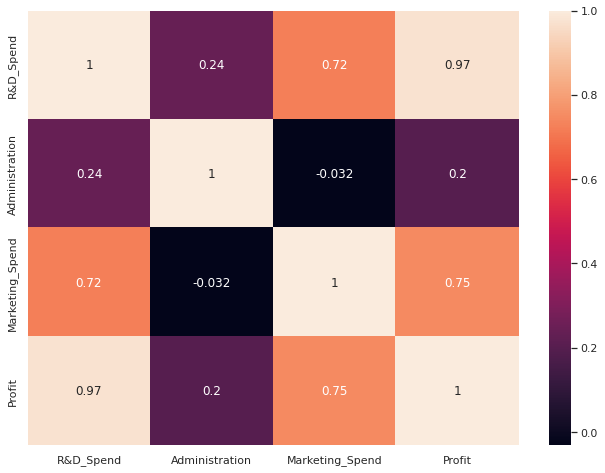

In [170]:
corr_matrix=data_pd.corr()
sns.heatmap(data=corr_matrix, annot= True)
plt.savefig('Plot E')
plt.show()

## 8. Performing Linear Regression

In [171]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [172]:
model.coef_

array([[1., 1., 1., 1.]])

In [173]:
model.intercept_

array([2.32830644e-10])

## 9. Predicting the output

In [174]:
y_pred_data=model.predict(data_pd)

## 10. Dimensionally reduced plot of the final model

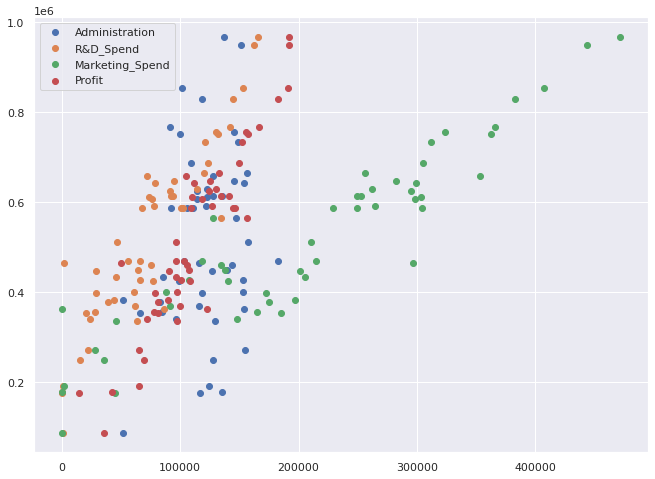

In [175]:
plt.scatter(data_pd[0:]['Administration'],y_pred_data)
plt.scatter(data_pd[0:]['R&D_Spend'],y_pred_data)
plt.scatter(data_pd[0:]['Marketing_Spend'],y_pred_data)
plt.scatter(data_pd[0:]['Profit'],y_pred_data)
plt.legend(labels=('Administration','R&D_Spend','Marketing_Spend','Profit'))
plt.savefig('Plot F')
plt.show()

In [176]:
print("The equation of the multivariate linear regression is: ")
col_vars=list(data_pd.columns.values)
print(col_vars)

The equation of the multivariate linear regression is: 
['R&D_Spend', 'Administration', 'Marketing_Spend', 'Profit']


In [177]:
x_eq=''
for i in range(len(col_vars)):
  x_eq+=str(model.coef_[0][i])+"*"+col_vars[i]+"+"
x_eq=x_eq+str(int(model.intercept_))
print(x_eq)

1.0000000000000007*R&D_Spend+0.9999999999999993*Administration+0.9999999999999996*Marketing_Spend+0.9999999999999991*Profit+0


In [178]:
y_pred=model.predict(x_test)
print("Two Samples of predicted revenue on the test set y_test is: ")
print(int(y_pred[0]))
print(int(y_pred[1]))

Two Samples of predicted revenue on the test set y_test is: 
614459
377545


## 11. Output and Resultant Prediction

In [179]:
R_cost=input("Enter R&D Spend: ")
A_cost=input("Enter Admin Spend: ")
M_cost=input("Enter Marketing Spend: ")
Profit=input("Enter profit: ")
Revenue=model.predict([[R_cost,A_cost,M_cost,Profit]])[0][0].round(2)
print("Estimated revenue on sample data: ",Revenue)

Enter R&D Spend: 500000
Enter Admin Spend: 2000000
Enter Marketing Spend: 300000
Enter profit: 450000
Estimated revenue on sample data:  3250000.0


## 12. Accuracy metrics

In [180]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
score= r2_score(y_test, y_pred)
print("r2 score is ", score)
absolute_error= mean_absolute_error(y_test, y_pred)
mean_error= mean_squared_error(y_test, y_pred)
print("Mean absolute error is ", absolute_error)
print("Mean squared error is ", mean_error)

r2 score is  1.0
Mean absolute error is  6.257323548197746e-11
Mean squared error is  7.30565917006834e-21


## Saving the model file

In [184]:
import pickle
pickle.dump(model, open('model.pkl','wb'))